<h2 id="import_data">Import Data</h2>

In [1]:
# install lib
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

path = "D:/diem_thi_thpt_2022.csv"
df = pd.read_csv(path)
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [3]:
print(df.dtypes)

SBD       int64
Toan    float64
Van     float64
Anh     float64
Ly      float64
Hoa     float64
Sinh    float64
Su      float64
Dia     float64
GDCD    float64
dtype: object


In [26]:
# clean data (ngu_van)
def roundPartial (value, resolution):
    return round (value / resolution) * resolution

df.iloc[:,2] = roundPartial(df.iloc[:,2], 0.25)

<h2 id="discriptive_statistics">Descriptive Statistical Analysis</h2>

In [5]:
df.describe()

,SBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD
count,9.954410e+05,982726.000000,981407.000000,870609.000000,325523.000000,327367.000000,322198.000000,659662.000000,657421.000000,554343.000000
mean,2.759692e+07,6.466254,6.507746,5.157686,6.723779,6.703898,5.019109,6.343930,6.677929,8.033266
std,1.917092e+07,1.675435,1.379602,1.949547,1.441925,1.600393,1.448270,1.612879,1.215013,1.067272
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000217e+07,5.400000,5.580000,3.600000,5.750000,5.500000,4.000000,5.250000,5.750000,7.500000
50%,2.801886e+07,6.800000,6.500000,4.800000,7.000000,7.000000,4.750000,6.500000,6.750000,8.250000
75%,4.400582e+07,7.800000,7.500000,6.600000,7.750000,8.000000,6.000000,7.500000,7.500000,8.750000
max,6.400659e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
df['Toan'].value_counts()

7.8     54495
7.6     53693
8.0     52273
7.4     51490
7.2     48716
8.2     48222
7.0     45808
6.8     42732
8.4     40654
6.6     40132
6.4     37964
6.2     35357
6.0     33409
5.8     31292
8.6     31021
5.6     29634
5.4     27651
5.2     25704
5.0     23712
4.8     22232
8.8     20796
4.6     20204
4.4     18528
4.2     16898
4.0     15359
3.8     14265
3.6     13066
9.0     12095
3.4     11981
3.2     10724
3.0      9661
2.8      8533
2.6      7207
2.4      5965
9.2      5915
2.2      4373
2.0      3123
9.4      2540
1.8      1980
1.6      1129
9.6       926
1.4       568
1.2       260
9.8       240
1.0       109
0.8        42
10.0       35
0.6         6
0.0         3
0.4         3
0.2         1
Name: Toan, dtype: int64

In [24]:
# Count notnull values in each column
df.iloc[:,1].count()

982726

In [69]:
# Count notnull values in each column & create a dataframe
NotNull = pd.DataFrame(df.iloc[:,1:].notnull().sum())
NotNull.rename(columns={0:'count'},inplace=True)

NotNull

,count
Toan,982726
Van,981407
Anh,870609
Ly,325523
Hoa,327367
Sinh,322198
Su,659662
Dia,657421
GDCD,554343


Text(0, 0.5, 'Attendees (in thousands)')

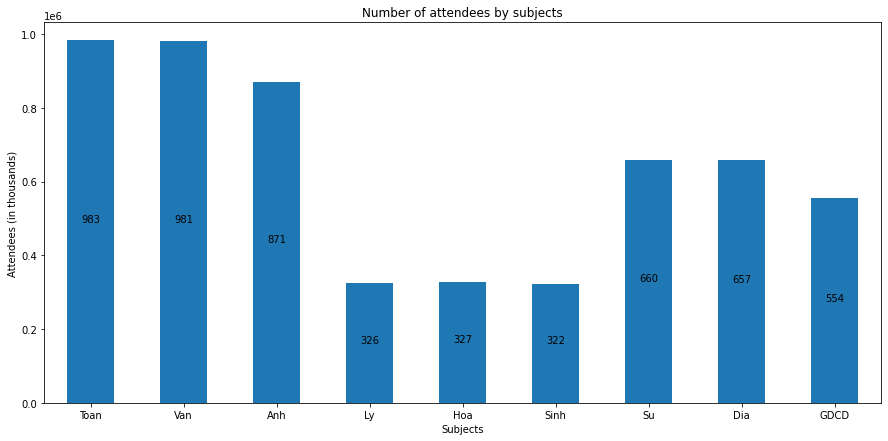

In [86]:
# add label: https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
def addlabels(x,y):
    for i in range(len(x)):
        round_y = round(y[i]/1000)
        plt.text(i, y[i]//2, round_y, ha = 'center')
        
NotNull['count'].plot(kind='bar',rot=0,x=NotNull.index,figsize=(15,7))
x = NotNull.index
y = NotNull.iloc[:,0]
addlabels(x,y)
plt.title('Number of participants by subjects')
plt.xlabel('Subjects')
plt.ylabel('Participants (in thousands)')

In [73]:
NotNull.iloc[:,0]

Toan    982726
Van     981407
Anh     870609
Ly      325523
Hoa     327367
Sinh    322198
Su      659662
Dia     657421
GDCD    554343
Name: count, dtype: int64

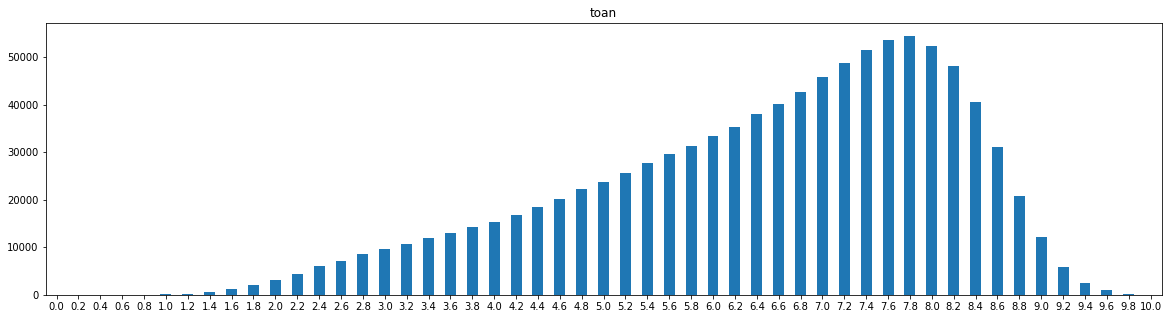

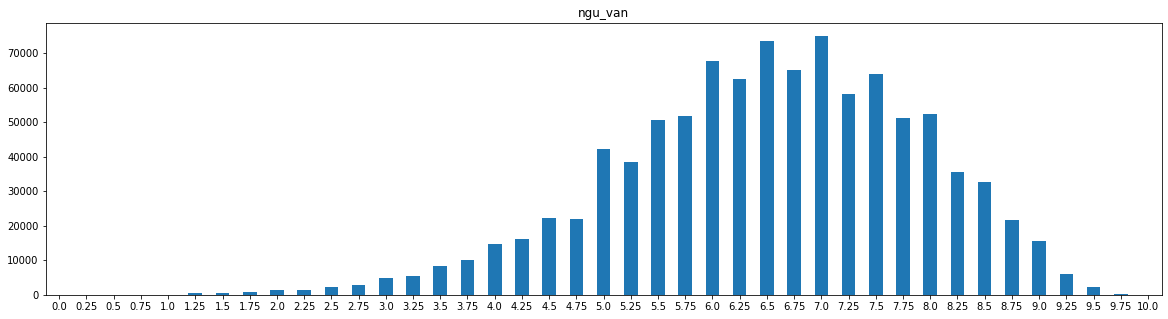

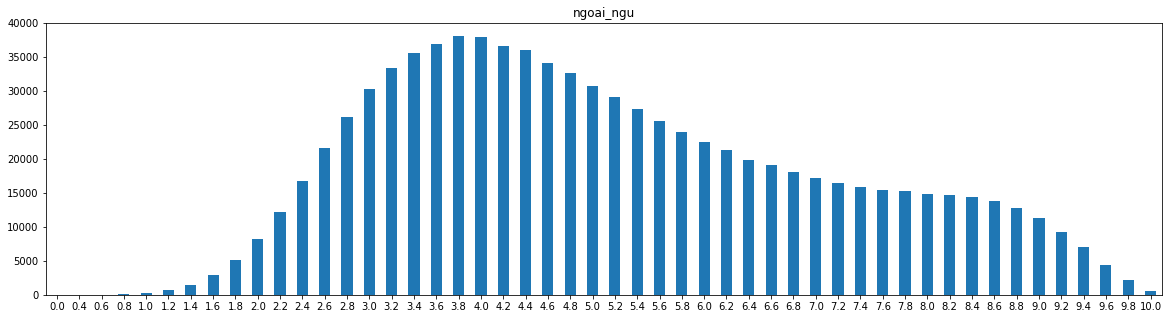

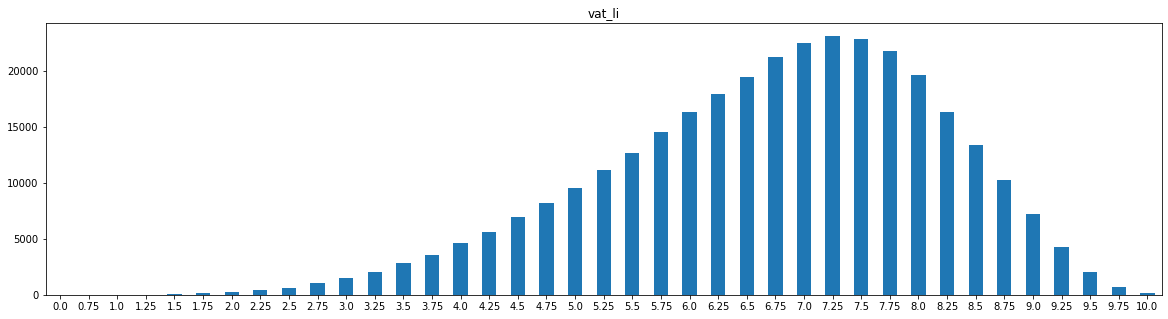

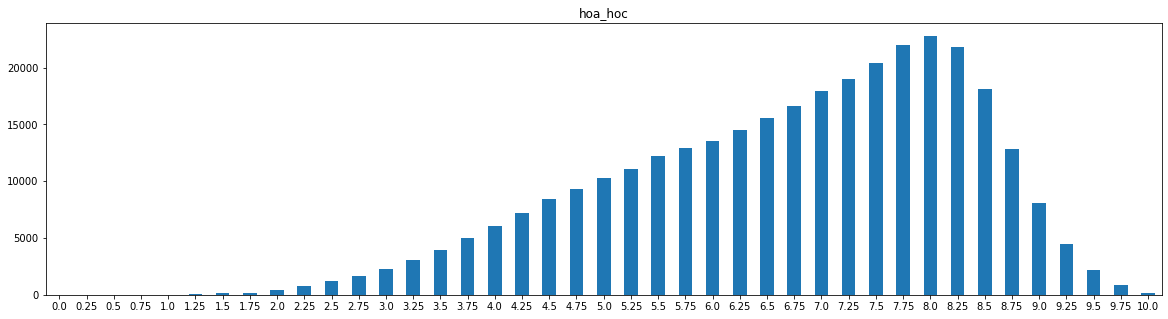

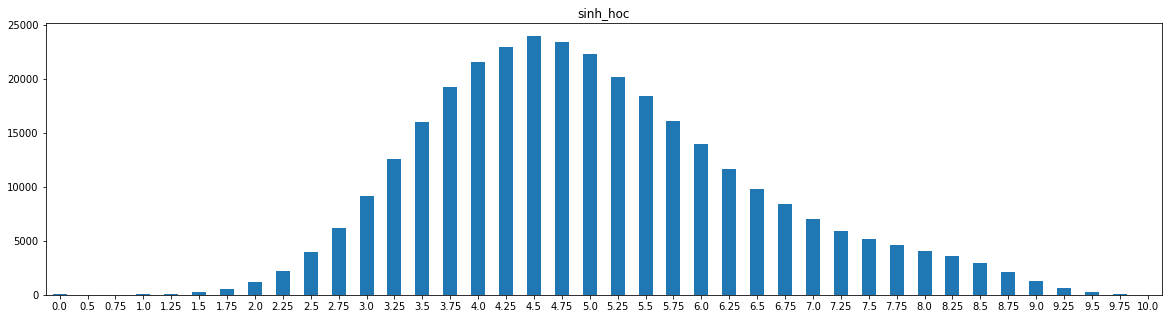

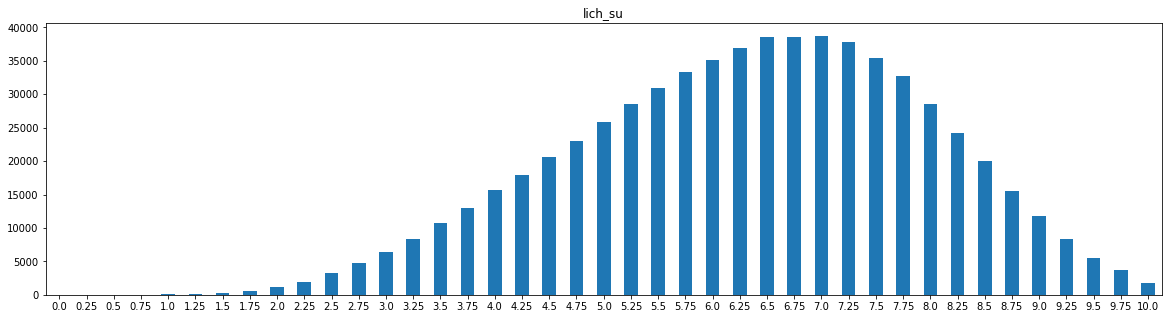

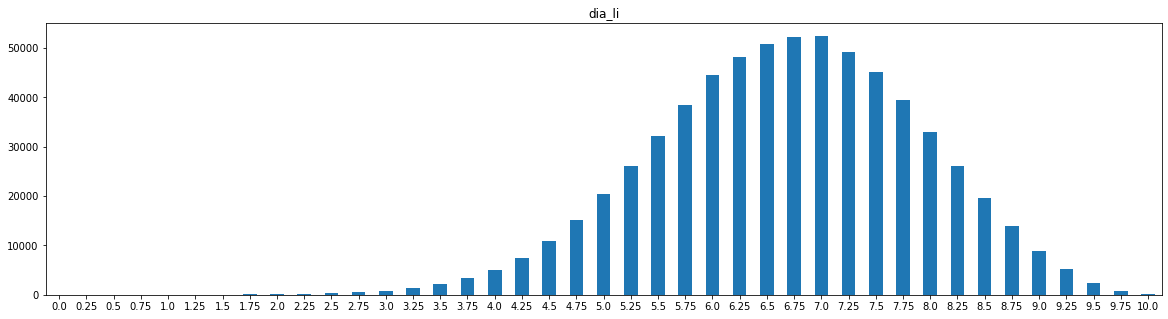

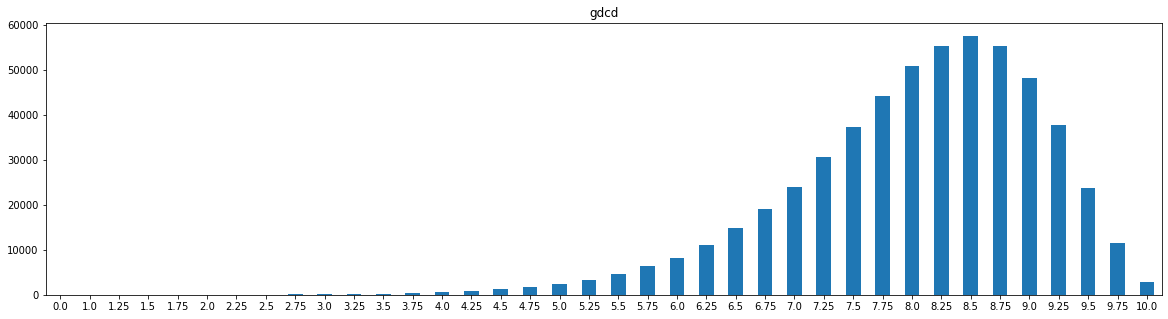

In [27]:
i = 1 
while i < 10:
    df.iloc[:,i].value_counts().sort_index().plot(kind='bar',figsize=(20,5),rot=0)
    plt.title(f'{df.columns[i]}')
    plt.show()
    i += 1